In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import seed
seed(1)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# df['date'] = pd.to_datetime(df["date"])
# df.head()

df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

df.columns.values
df.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [5]:
list(df.columns)

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month',
 'year']

In [6]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

In [7]:
corrDf = df.drop(columns=['id', 'zipcode'])
corrMatrix = corrDf.corr()
print (corrMatrix)


                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

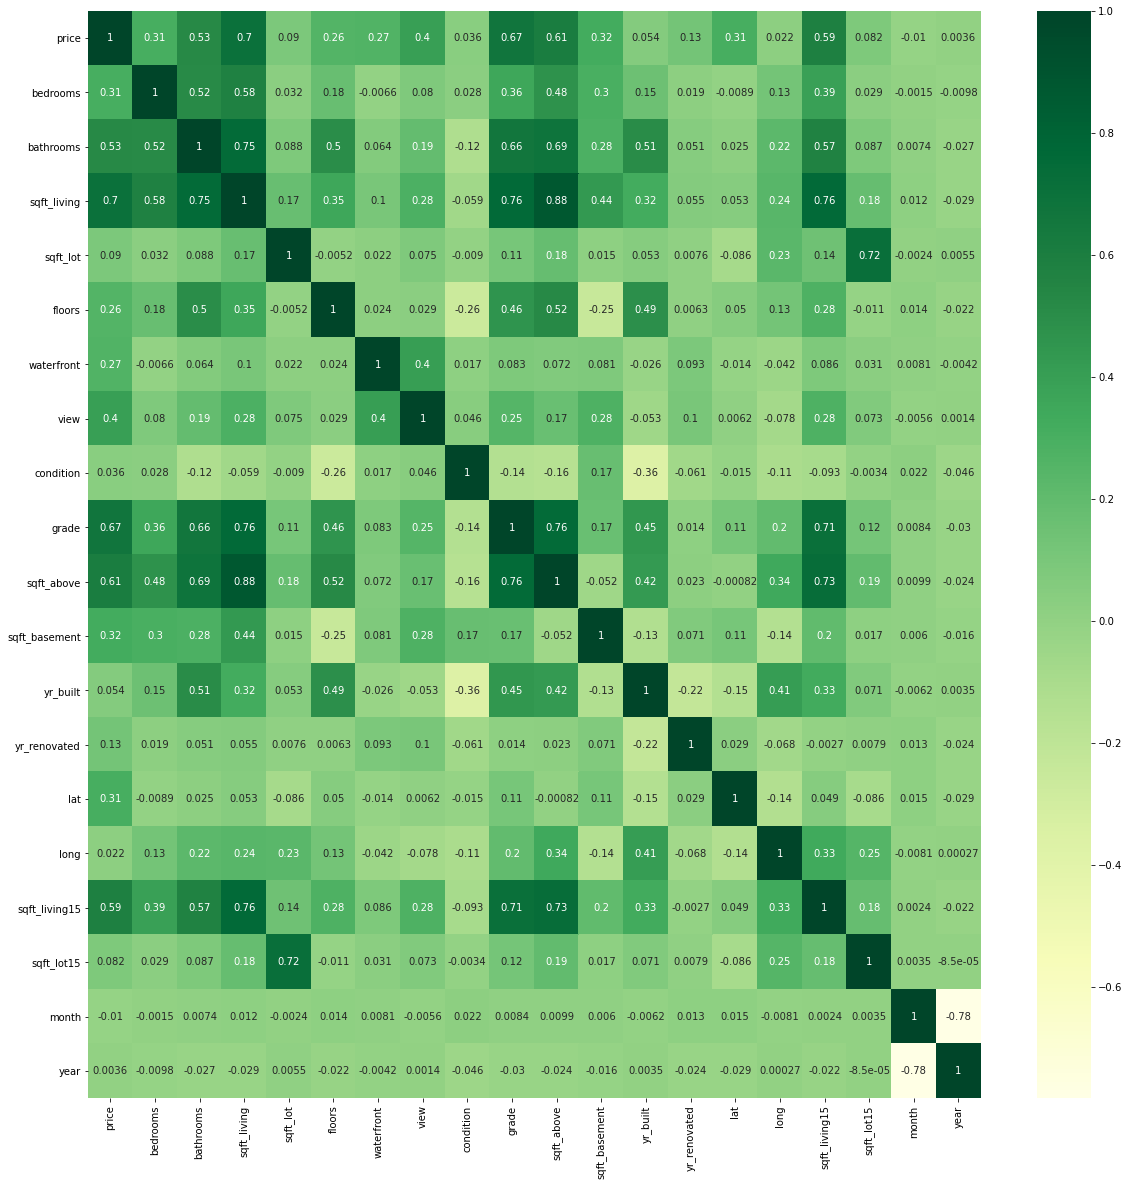

In [12]:
sn.heatmap(corrMatrix, annot=True, cmap="YlGn")
plt.show()
plt.rcParams["figure.figsize"] = (20,20)

In [19]:
corrDf.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
month              int64
year               int64
dtype: object

In [10]:
X=corrDf.drop("price", axis=1)
y=corrDf['price']

print(X.shape, y.shape)



(21613, 19) (21613,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=101, test_size=0.3)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Max: ',X_train.max())
print('Min: ', X_train.min())


Max:  1.0000000000000002
Min:  0.0


In [30]:
model = Sequential()

model.add(Dense(19,activation='relu'))


model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

In [31]:
model.compile(optimizer='adam',loss='mse')

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 423625654272.0000 - val_loss: 433002872832.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 422311723008.0000 - val_loss: 428227919872.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 402831278080.0000 - val_loss: 382186029056.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 308139982848.0000 - val_loss: 231600455680.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 150876700672.0000 - val_loss: 110671372288.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 99557081088.0000 - val_loss: 102868017152.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 96939851776.0000 - val_loss: 100991361024.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 95146819584.0000 - val_loss: 99051151360.0000
Epoch 9/400
119/119 

119/119 [==============================] - 0s 3ms/step - loss: 37937647616.0000 - val_loss: 37469126656.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 37809610752.0000 - val_loss: 37337108480.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 37614567424.0000 - val_loss: 37316820992.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 37534089216.0000 - val_loss: 37062049792.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 37418520576.0000 - val_loss: 36959657984.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 37278089216.0000 - val_loss: 36817432576.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 37208670208.0000 - val_loss: 36719243264.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 37079314432.0000 - val_loss: 36594651136.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 1s 6ms/step - loss: 33164115968.0000 - val_loss: 32474906624.0000
Epoch 136/400
119/119 [==============================] - 1s 7ms/step - loss: 33095034880.0000 - val_loss: 32433631232.0000
Epoch 137/400
119/119 [==============================] - 1s 9ms/step - loss: 33052049408.0000 - val_loss: 32405477376.0000
Epoch 138/400
119/119 [==============================] - 1s 5ms/step - loss: 33077506048.0000 - val_loss: 32355051520.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 33013477376.0000 - val_loss: 32324694016.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32978987008.0000 - val_loss: 32291524608.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32950433792.0000 - val_loss: 32298672128.0000
Epoch 142/400
119/119 [==============================] - 1s 4ms/step - loss: 32915150848.0000 - val_loss: 32279154688.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 31544627200.0000 - val_loss: 30866341888.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31495155712.0000 - val_loss: 30916352000.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31504138240.0000 - val_loss: 30862288896.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31502536704.0000 - val_loss: 30831583232.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31476875264.0000 - val_loss: 30811408384.0000
Epoch 206/400
119/119 [==============================] - 0s 4ms/step - loss: 31491821568.0000 - val_loss: 30771302400.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 31440615424.0000 - val_loss: 30764838912.0000
Epoch 208/400
119/119 [==============================] - 1s 6ms/step - loss: 31409960960.0000 - val_loss: 30820849664.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30445899776.0000 - val_loss: 29929129984.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30416648192.0000 - val_loss: 29878288384.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30423042048.0000 - val_loss: 29890283520.0000
Epoch 270/400
119/119 [==============================] - 0s 4ms/step - loss: 30412259328.0000 - val_loss: 29859987456.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30415208448.0000 - val_loss: 29846185984.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30401413120.0000 - val_loss: 29821954048.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30370007040.0000 - val_loss: 29916549120.0000
Epoch 274/400
119/119 [==============================] - 0s 4ms/step - loss: 30358589440.0000 - val_loss: 29817604096.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29513553920.0000 - val_loss: 29112907776.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 29480329216.0000 - val_loss: 29092628480.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 29467133952.0000 - val_loss: 29195634688.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 29471666176.0000 - val_loss: 29246210048.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 29449213952.0000 - val_loss: 29196748800.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 29459656704.0000 - val_loss: 29037252608.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 29422684160.0000 - val_loss: 29099112448.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 29423947776.0000 - val_loss: 29050869760.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 1s 6ms/step - loss: 28518350848.0000 - val_loss: 28224327680.0000
Epoch 400/400
119/119 [==============================] - 0s 4ms/step - loss: 28503195648.0000 - val_loss: 28330641408.0000


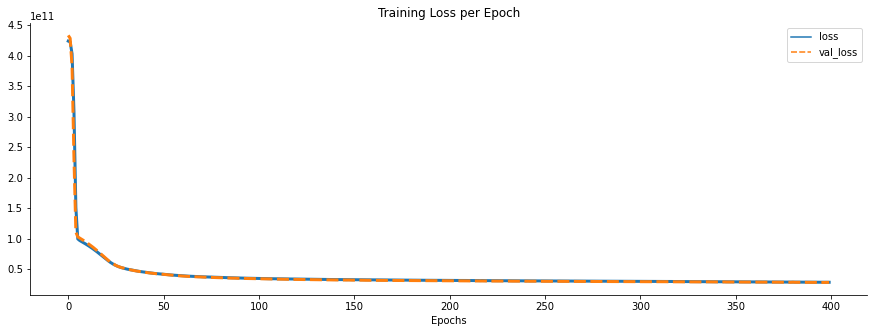

In [32]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sn.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sn.despine()


NameError: name 'mean_absolute_error' is not defined